## RANSAC
 Use RANSAC to remove outlier key point matches and fit a transformation model between two images.


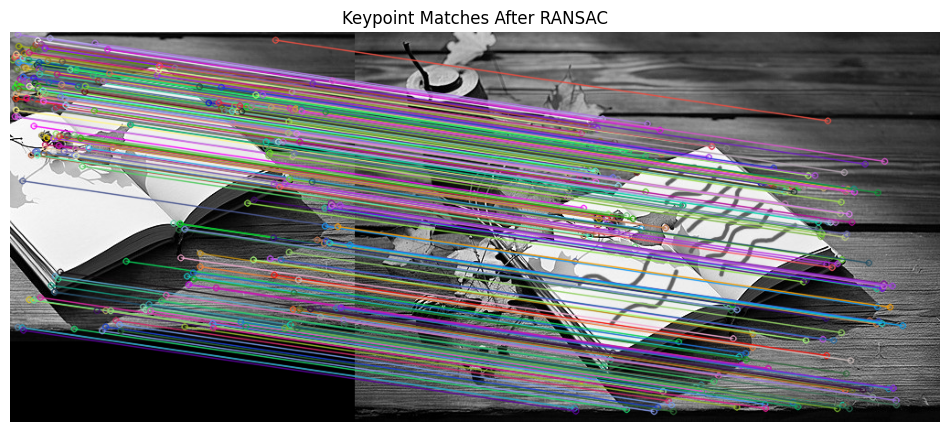


Transformation Matrix (Homography):
 [[ 1.00038254e+00  1.14122795e-03  2.26910096e+02]
 [-3.13714625e-04  1.00120340e+00  8.79640292e+01]
 [-5.08666638e-07  2.66678736e-06  1.00000000e+00]]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images in grayscale
img1 = cv2.imread('/content/image1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/img a.jpg', cv2.IMREAD_GRAYSCALE)

# Check if images are loaded correctly
if img1 is None or img2 is None:
    print("Error: Unable to load images. Check file paths.")
else:
    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and descriptors
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Use FLANN-based matcher
    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1, des2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    pts1 = []
    pts2 = []

    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)
            pts1.append(kp1[m.queryIdx].pt)
            pts2.append(kp2[m.trainIdx].pt)

    pts1 = np.float32(pts1)
    pts2 = np.float32(pts2)

    # Apply RANSAC
    if len(pts1) >= 4:
        H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)

        # Extract only inlier matches
        matchesMask = mask.ravel().tolist()
        inlier_matches = [m for m, keep in zip(good_matches, matchesMask) if keep]

        # Fix the matchesMask size issue
        matchesMaskFiltered = [1] * len(inlier_matches)  # Create a mask with all inliers

        # Draw matches after RANSAC filtering
        img_matches = cv2.drawMatches(img1, kp1, img2, kp2, inlier_matches, None,
                                      matchesMask=matchesMaskFiltered,
                                      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

        # Display the matched keypoints after RANSAC
        plt.figure(figsize=(12, 6))
        plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Keypoint Matches After RANSAC")
        plt.show()

        print("\nTransformation Matrix (Homography):\n", H)
    else:
        print("\nNot enough matches to compute RANSAC transformation.")

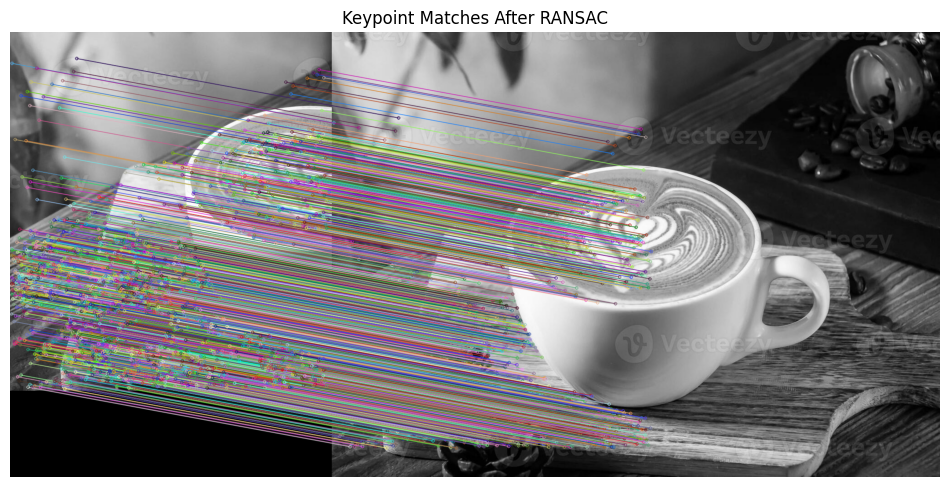


Transformation Matrix (Homography):
 [[ 1.00007270e+00  2.86740210e-05 -2.17848480e-02]
 [ 5.30433590e-05  1.00006540e+00  1.30966122e+02]
 [ 6.96579128e-08  2.85730182e-08  1.00000000e+00]]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images in grayscale
img1 = cv2.imread('/content/img1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/img2.jpg', cv2.IMREAD_GRAYSCALE)

# Check if images are loaded correctly
if img1 is None or img2 is None:
    print("Error: Unable to load images. Check file paths.")
else:
    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and descriptors
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Use FLANN-based matcher
    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1, des2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    pts1 = []
    pts2 = []

    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)
            pts1.append(kp1[m.queryIdx].pt)
            pts2.append(kp2[m.trainIdx].pt)

    pts1 = np.float32(pts1)
    pts2 = np.float32(pts2)

    # Apply RANSAC
    if len(pts1) >= 4:
        H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)

        # Extract only inlier matches
        matchesMask = mask.ravel().tolist()
        inlier_matches = [m for m, keep in zip(good_matches, matchesMask) if keep]

        # Fix the matchesMask size issue
        matchesMaskFiltered = [1] * len(inlier_matches)  # Create a mask with all inliers

        # Draw matches after RANSAC filtering
        img_matches = cv2.drawMatches(img1, kp1, img2, kp2, inlier_matches, None,
                                      matchesMask=matchesMaskFiltered,
                                      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

        # Display the matched keypoints after RANSAC
        plt.figure(figsize=(12, 6))
        plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Keypoint Matches After RANSAC")
        plt.show()

        print("\nTransformation Matrix (Homography):\n", H)
    else:
        print("\nNot enough matches to compute RANSAC transformation.")